<a href="https://colab.research.google.com/github/joseeden/joeden/blob/master/docs/021-Software-Engineering/021-Jupyter-Notebooks/001-Sample-Notebooks/007-merging-data-with-pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Chicago Data Portal Dataset  

Chicago is divided into 50 wards, each representing a local neighborhood. We will use the following tables:  

- **The Ward Data**  

  - Local government data, including office addresses.
  - The wards table contains 50 rows and 4 columns.
  - One row for each ward's government details.
  - Download the file here: [chicago_wards.p](/docs/021-Software-Engineering/021-Jupyter-Notebooks/000-Sample-Datasets/joining-data-with-pandas/chicago_wards.p)

- **Census table** 
  
  - Population data for 2000 and 2010, percentage changes, and ward center addresses.  
  - The census table has 50 rows and 6 columns
  - Covers population data and ward center addresses.
  - Download the file here: [chicago_census.p](/docs/021-Software-Engineering/021-Jupyter-Notebooks/000-Sample-Datasets/joining-data-with-pandas/chicago_census.p)

- **Licenses Table**

  - Holds information such as business addresses and the wards.
  - Also related to the wards data through the `wards` column.
  - Download the file here: [chicago_business_licenses.p](/docs/021-Software-Engineering/021-Jupyter-Notebooks/000-Sample-Datasets/joining-data-with-pandas/chicago_business_licenses.p)

- **Business Owners**
  - Contains records of business owners in different wards.
  - Download the file here: [chicago_business_owners.p](/docs/021-Software-Engineering/021-Jupyter-Notebooks/000-Sample-Datasets/joining-data-with-pandas/chicago_business_owners.p)

- **Demographics**
  - Contains records of median income by zip code.
  - Demographics information about the neighborhoods where the businesses are
  - Download the file here: [chicago_zip_demograph.p](/docs/021-Software-Engineering/021-Jupyter-Notebooks/000-Sample-Datasets/joining-data-with-pandas/chicago_zip_demograph.p)

- **Land Use**
  - Contains on the percentage of vacant land by city ward
  - Download the file here: [chicago_land_use.p](/docs/021-Software-Engineering/021-Jupyter-Notebooks/000-Sample-Datasets/joining-data-with-pandas/chicago_land_use.p)

# Importing the Datasets

Import the wards data:

In [112]:
import pandas as pd 

url = 'https://raw.githubusercontent.com/joseeden/joeden/refs/heads/master/docs/021-Software-Engineering/021-Jupyter-Notebooks/000-Sample-Datasets/joining-data-with-pandas/chicago_wards.p'

wards = pd.read_pickle(url)
print(wards.head())
print(wards.shape)

  ward            alderman                          address    zip
0    1  Proco "Joe" Moreno        2058 NORTH WESTERN AVENUE  60647
1    2       Brian Hopkins       1400 NORTH  ASHLAND AVENUE  60622
2    3          Pat Dowell          5046 SOUTH STATE STREET  60609
3    4    William D. Burns  435 EAST 35TH STREET, 1ST FLOOR  60616
4    5  Leslie A. Hairston            2325 EAST 71ST STREET  60649
(50, 4)


Import the census data:

In [113]:
import pandas as pd 

url = 'https://raw.githubusercontent.com/joseeden/joeden/refs/heads/master/docs/021-Software-Engineering/021-Jupyter-Notebooks/000-Sample-Datasets/joining-data-with-pandas/chicago_census.p'

census = pd.read_pickle(url)
print(census.head())
print(census.shape)

  ward  pop_2000  pop_2010 change                                  address  \
0    1     52951     56149     6%              2765 WEST SAINT MARY STREET   
1    2     54361     55805     3%                 WM WASTE MANAGEMENT 1500   
2    3     40385     53039    31%                      17 EAST 38TH STREET   
3    4     51953     54589     5%  31ST ST HARBOR BUILDING LAKEFRONT TRAIL   
4    5     55302     51455    -7%  JACKSON PARK LAGOON SOUTH CORNELL DRIVE   

     zip  
0  60647  
1  60622  
2  60653  
3  60653  
4  60637  
(50, 6)


Import the licenses data:

In [ ]:
import pandas as pd 

url = 'https://raw.githubusercontent.com/joseeden/joeden/refs/heads/master/docs/021-Software-Engineering/021-Jupyter-Notebooks/000-Sample-Datasets/joining-data-with-pandas/chicago_business_licenses.p'

licenses = pd.read_pickle(url)
print(licenses.head())
print(licenses.shape)

Import the business owners data:

In [ ]:
import pandas as pd 

url = 'https://raw.githubusercontent.com/joseeden/joeden/refs/heads/master/docs/021-Software-Engineering/021-Jupyter-Notebooks/000-Sample-Datasets/joining-data-with-pandas/chicago_business_owners.p'

biz_owners = pd.read_pickle(url)
print(biz_owners.head())
print(biz_owners.shape)

Import the demographics table:

In [ ]:
import pandas as pd 

url = 'https://raw.githubusercontent.com/joseeden/joeden/refs/heads/master/docs/021-Software-Engineering/021-Jupyter-Notebooks/000-Sample-Datasets/joining-data-with-pandas/chicago_zip_demograph.p'

zip_demo = pd.read_pickle(url)
print(zip_demo.head())
print(zip_demo.shape)

Import the land use table.

In [ ]:
import pandas as pd 

url = 'https://raw.githubusercontent.com/joseeden/joeden/refs/heads/master/docs/021-Software-Engineering/021-Jupyter-Notebooks/000-Sample-Datasets/joining-data-with-pandas/chicago_land_use.p'

land_use = pd.read_pickle(url)
print(land_use.head())
print(land_use.shape)

# Merging Tables  

The tables are related by the **ward** column. Using this column, we can merge the wards table with the census table, matching rows based on ward numbers.

Using pandas' `merge` method, we can combine the two DataFrames. The `on` argument specifies the **ward** column for the merge. The resulting DataFrame includes 50 rows and 9 columns, showing only rows with matching ward values in both tables. This is called an **inner join**.

The wards table is considered the "left table" and thus the column from this table will appear first, followed by the census table ("right table") columns.

In [ ]:
wards_census = wards.merge(census, on='ward')
print(wards_census.head(6))

Merged tables may include columns with suffixes like `_x` or `_y` when both tables have overlapping column names (e.g., address or zip).

# Controlling Suffixes  

The `suffix` argument in `merge` allows customization. For instance, suffixes can be set to `'_ward'` for the left table and `'_cen'` for the right, making it easier to distinguish columns.

In [ ]:
wards_census = wards.merge(census, on='ward', suffixes=('_ward', '_cen'))
print(wards_census.head())
print(wards_census.shape)

# Types of Relationships

- **One-to-One**

  - Each row in the left table matches exactly one row in the right table.
  - Example: The relationship between the *wards* and *census* tables.
    - Each ward in the *wards* table corresponds to one population entry in the *census* table.
    - For instance, ward 3 appears only once in both tables, ensuring a single population value for each ward.

- **One-to-Many**

- Each row in the left table can relate to multiple rows in the right table.
- Example: The relationship between the *wards* table and a *licenses* table containing business licenses.
  - Each ward can have many businesses, so rows in the *wards* table are repeated when merged with the *licenses* table.
  - For instance, ward 1 and its alderman appear multiple times due to many businesses in the 1st ward.

# Merging One-to-Many

Merging is performed using the `merge` method with the `on` attribute set to the shared column, e.g., *ward*. The resulting table combines ward data with all matching rows from the business license data.

Example: The *wards* table has 50 rows. 

- After merging with the *licenses* table, the new table has 10,000 rows.
- Number of rows in the resulting table is often larger than in the left table.

In [ ]:
wards_licenses = wards.merge(licenses, on='ward', suffixes=('_ward', '_lic'))
print(wards_licenses.head())
print(wards_licenses.shape)

Next, merge the business owners table with the licenses table to find out what is the most common business owner title. After merging, group the results by title and then count the number of accounts.

In [ ]:
licenses_owners = licenses.merge(biz_owners, on='account')

counted_df = licenses_owners.groupby("title").agg({'account':'count'})
sorted_df = counted_df.sort_values(by='account', ascending=False)
print(sorted_df.head())

# Merging Multiple DataFrames

Merging multiple DataFrames allows you to combine related data from different tables into a single table for analysis. This is useful when data is spread across multiple sources.

Consider the three dataframes: licenses, wards, and zip_demo.

A reasonable extension of our review of Chicago business data would include looking at demographics information about the neighborhoods where the businesses are. For this, we'll use the demographics table.

Merge licenses and zip_demo, on zip; and merge the wards on ward. Next, group the results of the three merged tables by the column `alderman` and find the median `income`.

In [ ]:
licenses_zip_ward = licenses.merge(zip_demo, on='zip') \
            			.merge(wards, on='ward')

print(licenses_zip_ward.groupby('alderman').agg({'income':'median'}))

# One-to-Many Merge with Multiple Tables

In this step, you are planning to start a lawn care business in Chicago. To find the best location for your goat farm, you need an area with plenty of space and few nearby businesses or residents to avoid complaints about odor. 

To make an informed decision, you'll merge three tables: 

- the `land_use` table (showing vacant land by ward), 
- the `census` table (providing population data by ward), and 
- the `licenses` table (listing businesses by ward).

In [ ]:
# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census, on='ward') \
                    .merge(licenses, on='ward', suffixes=('_cen','_lic'))

# Group by ward, pop_2010, and vacant, then count the # of accounts
pop_vac_lic = land_cen_lic.groupby(['ward','pop_2010','vacant'], 
                                   as_index=False).agg({'account':'count'})

# Sort pop_vac_lic and print the results
sorted_pop_vac_lic = pop_vac_lic.sort_values(
                            ['vacant', 'account', 'pop_2010'], 
                            ascending=[False, True, True])

# Print the top few rows of sorted_pop_vac_lic
print(sorted_pop_vac_lic.head())

# Total Riders in a Month

Your task is to calculate the total number of rides at the Wilson station (`station_name == 'Wilson'`) on weekdays (`day_type == 'Weekday'`) in July (`month == 7`) using data from three different tables. Chicago provides this data in separate tables, and you will merge them to find the answer.

The relationship between the tables is shown in the diagram below.

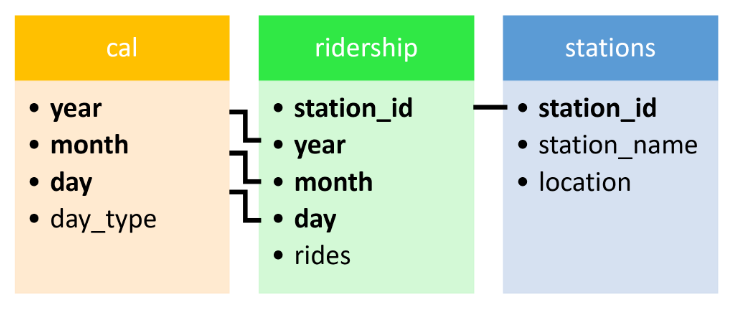

Create the `cal`, `ridership`, and `stations` DataFrames. 

In [ ]:
import pandas as pd 

url = 'https://raw.githubusercontent.com/joseeden/joeden/refs/heads/master/docs/021-Software-Engineering/021-Jupyter-Notebooks/000-Sample-Datasets/joining-data-with-pandas/cta_calendar.p'

cal = pd.read_pickle(url)
print(cal.head())
print(cal.shape)

In [ ]:
import pandas as pd 

url = 'https://raw.githubusercontent.com/joseeden/joeden/refs/heads/master/docs/021-Software-Engineering/021-Jupyter-Notebooks/000-Sample-Datasets/joining-data-with-pandas/cta_ridership.p'

ridership = pd.read_pickle(url)
print(ridership.head())
print(ridership.shape)

In [ ]:
import pandas as pd 

url = 'https://raw.githubusercontent.com/joseeden/joeden/refs/heads/master/docs/021-Software-Engineering/021-Jupyter-Notebooks/000-Sample-Datasets/joining-data-with-pandas/cta_stations.p'

stations = pd.read_pickle(url)
print(stations.head())
print(stations.shape)

Based on the diagram shown previously, the calendar table and ridership table are related to each other through the columns: 'year', `month`, and 'day'. Merge the two tables.

In [ ]:
ridership_cal = ridership.merge(cal, on=('year', 'month', 'day'))
print(ridership_cal)

Extend the previous merge to three tables by also merging the stations table.

In [ ]:
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']) \
            				.merge(stations, on='station_id')
print(ridership_cal_stations)              

Create a variable to select the appropriate rows from the merged table so that you can sum the rides column. 

Recall that the goal is to calculate the total number of rides at the Wilson station (`station_name == 'Wilson'`) on weekdays (`day_type == 'Weekday'`) in July (`month == 7`)

In [ ]:
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']) \
							.merge(stations, on='station_id')

# Create a filter to filter ridership_cal_stations
filter_criteria = ((ridership_cal_stations['month'] == 7) 
                   & (ridership_cal_stations['day_type'] == 'Weekday') 
                   & (ridership_cal_stations['station_name'] == 'Wilson'))

# Use .loc and the filter to select for rides
print(ridership_cal_stations.loc[filter_criteria, 'rides'].sum())